# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [31]:
# Your work here.
%matplotlib inline
import numpy as np
import scipy.stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Custom modules
from aplib import aplib
from aplib.cohenstats import cohenstats

In [3]:
num_samples = df.shape[0]
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


# Is the distribution of body temperatures normal?

In order to test whether body temperatures are normally distributed, a chi-squared test is performed comparing the emprirical body temperature distribution to a normal distribution fitted to the empirical data.

The chi-square statistics are first calculated based on first principles and then validated against the built-in scipy function. The chi-square test does not reject the null hypothesis that the distribution is normally distributed at the 90% confidence internval.

A Q-Q plow is created to show that the emprirical distribution is close to normal

In [101]:
# Empirical data is filtered into bins. In Excercise 3, a built-in histogram function is used to facilitate

num_bins = 10
deg_f = num_bins - 1 - 2 # Test fits mean and volatility based on empirical data
sig_level = 0.05

num_std_dev = 1 # Sets number of standard deviations over which data is binned, assuming a normal distribution
df_temp_mean = df["temperature"].mean()
df_temp_std = df["temperature"].std()

print df_temp_mean
print df_temp_std

bins = np.linspace(df_temp_mean - num_std_dev *  df_temp_std, 
                   df_temp_mean + num_std_dev *  df_temp_std,
                   num_bins - 1)

digitized = np.digitize(df["temperature"], bins, right=True)
bin_counts = [df["temperature"][digitized == i].count() for i in range(0, len(bins)+1)]

print bins

print digitized

bin_counts

98.2492307692
0.733183158039
[ 97.51604761  97.6993434   97.88263919  98.06593498  98.24923077
  98.43252656  98.61582235  98.79911814  98.98241393]
[9 5 2 9 3 9 3 8 5 6 8 0 4 7 2 8 5 4 0 9 5 4 6 5 2 3 2 4 5 4 5 1 6 6 9 9 9
 5 3 0 5 5 0 0 9 3 0 0 3 0 8 5 6 6 4 6 8 4 4 1 9 5 4 6 7 0 0 6 7 8 4 2 3 8
 9 8 3 5 0 1 8 3 0 9 6 0 6 3 7 4 2 9 8 0 2 0 9 7 8 3 9 6 3 9 1 0 0 6 7 0 8
 3 4 9 9 3 9 2 7 5 2 3 9 0 0 0 2 4 3 7]


[21, 4, 10, 16, 13, 14, 13, 8, 12, 19]

In [102]:
# Theoretically normally distributed tempertures are fit into bins.
# First and last bins are assigned left tail and right tail probabilities

norm_fit = scipy.stats.norm(loc = df_temp_mean, scale = df_temp_std)
cdf_fitted = norm_fit.cdf(bins) * num_samples
exp_count = np.insert(cdf_fitted[1:] - cdf_fitted[0:-1], 0, cdf_fitted[0])
exp_count = np.append(exp_count, num_samples - cdf_fitted[-1])
exp_count

array([ 20.62518301,   8.8363728 ,  10.64832423,  12.05829763,
        12.83182234,  12.83182234,  12.05829763,  10.64832423,
         8.8363728 ,  20.62518301])

In [103]:
# The chi-squared statistic is calculated

chi_squared_stat = ((bin_counts - exp_count)**2 / exp_count).sum()

print chi_squared_stat
print deg_f

6.08331209951
7


In [104]:
# The p-value is calculated for the given chi-squared value and degrees of freedom
# Results show that we cannot reject the null hypothesis that the distribution is normally distributed
# at a 90% confidence interval

sig_test = scipy.stats.distributions.chi2.sf(chi_squared_stat, deg_f)
sig_test

0.5300558581309297

In [105]:
# Calculations are cross-validated with in the inbuilt function

sig_test2 = scipy.stats.chisquare(f_obs=bin_counts, f_exp=exp_count, ddof=2, axis=0)
sig_test2

Power_divergenceResult(statistic=6.0833120995057275, pvalue=0.5300558581309297)

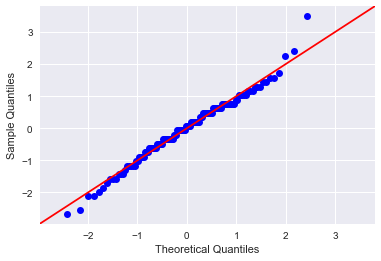

In [106]:
# Q-Q plot drawn to visually show correspondence of empirical distribution to normal

fig = sm.qqplot(df["temperature"], fit=True, line='45')
fig.show()

In [14]:
# Additional test based on D’Agostino and Pearson’s test of normality

normal_test = scipy.stats.mstats.normaltest(df["temperature"])
normal_test

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

# Is the true population mean really 98.6 degrees F?

Population mean is unlikely to be 98.6 degrees, the null hypothesis that this is the mean can be rejected at a 99% level of confidence.

Sapme size of 130 is > 30 and large enough to make use of z statistic reasonable. Results when using either t statistics or z statistis are similar in allowing rejection of the null hypothesis at a high level of confidence.

A one sample test is used as we comparing the mean of a single empirical distribution to given value. A two sample test is used to compare means for males and females in the next excercise.

In [116]:
std_error = df["temperature"].std() / np.sqrt(num_samples - 1)
score = (98.6 - df["temperature"].mean())/std_error
score

5.4338027005236693

In [120]:
p_values_z = scipy.stats.norm.sf(abs(score))
p_values_z

2.758278803228635e-08

In [121]:
p_values_z = scipy.stats.t.sf(abs(score),num_samples-1)
p_values_z

1.326732372915566e-07

In [122]:
sig_level
std_error_dist = scipy.stats.norm(loc = df["temperature"].mean(), scale = df_temp_std)

# At what temperature should we consider someone's temperature to be "abnormal"?

Temperatures below 96.81 degrees and above 99.69 degrees should only be observed once in 20 measurements and could be considered "abnormal"

In [123]:
lower_bound, upper_bound = std_error_dist.ppf(sig_level/2), std_error_dist.ppf(1-sig_level/2)
print ('There is a {0:.0f}% probability that temperature is between {1:.2f} vs {2:.2f}').format((1-sig_level)*100,
                                                                                                lower_bound,
                                                                                                upper_bound)


There is a 95% probability that temperature is between 96.81 vs 99.69


# Is there a significant difference between males and females in normal temperature?

Cohen D statistics shows a moder size effect of geneder on temperature (with an absolute value of 0.4)

Calculation of z score for difference in distribution means also shows that the null hypothesis that temperatures for males and femals is the same can be rejected a 95% confidence interval

In [29]:
# Call module to calculate Cohen's D as well a the standard error of the parameter estiamte

cohen_d, cohen_d_std = cohenstats.CohenEffectSize(df[df["gender"]=='M']["temperature"],df[df["gender"]=='F']["temperature"])
cohen_d, cohen_d_std

(-0.40089173785982207, 0.02505573361623888)

In [124]:
# Calculate z statistic of difference in distributions

mu1 = df[df["gender"]=='M']["temperature"].mean()
mu2 = df[df["gender"]=='F']["temperature"].mean()
sigma1 = df[df["gender"]=='M']["temperature"].std()
sigma2 = df[df["gender"]=='F']["temperature"].std()
n1 = df[df["gender"]=='M']["temperature"].size
n2 = df[df["gender"]=='F']["temperature"].size

diff_temp_gender_mean = mu1 - mu2
diff_temp_gender_std = np.sqrt((sigma1**2)/n1 + (sigma2**2)/n2)

score_gender = diff_temp_gender_mean / diff_temp_gender_std

p_values_gender = scipy.stats.norm.sf(abs(diff_temp_gender_mean / diff_temp_gender_std))

print ('The null hypothesis that temperatures accross genders is the same '
       'is rejected at a {0:.1f}% level of confidence').format((p_values_gender)*100,
                                                               lower_bound,
                                                               upper_bound)

The null hypothesis that temperatures accross genders is the same is rejected at a 1.1% level of confidence
